In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter


In [4]:
pd.read_csv('email_campaigns.csv')

,CampaignID,SendDate,SendHour,AudienceSize,Subject,TopKeywords,OpenRate,ClickRate,ConversionRate,DeviceType,CustomerSegment,CampaignType
0,CMP11935,2025-07-10,21,1000,must-have — offres limitées aujourd’hui,"coulisses, tendances, incontournable, édition ...",16.2,1.31,0.00,Mobile,Returning,Newsletter
1,CMP16494,2023-10-14,10,1000,commande : jusqu’à 10% de remise !,"sauvegardé, disponible, attention, vérifiez, v...",23.33,3.09,0.00,Mobile,Returning,Reminder
2,CMP11720,2023-10-19,8,10000,innovation pour vous — 6 jours seulement,"must-have, newsletter, collaboration, story, t...",0.5,2.71,0.00,Mobile,Inactive,Newsletter
3,CMP19120,2024-12-15,9,2000,promo : découvrez nos nouveautés,"client, craquez, exceptionnelle, gagnez, deal,...",10.84,1.61,0.00,Mobile,Inactive,Promotion
4,CMP10360,2023-11-16,5,2000,avantage — livraison gratuite,"prix, pack, soldes, essai, anniversaire, rabais",3.84,0.71,0.00,Desktop,New,Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,CMP21964,2023-04-27,17,2000,exception sur nos best-sellers,"pack, craquez, stock, bonus, remise, équipe",20.06,2.78,0.00,Mobile,Returning,Promotion
11996,CMP15191,2025-02-28,21,5000,collaboration : nos clients adorent,"éditorial, innovation, sélection, créatif, act...",9.89,0.93,0.00,Desktop,New,Newsletter
11997,CMP15390,2024-01-17,20,1000,cadeau : jusqu’à 15% de remise ! ❤️,"automne, chaud, fin d’année, été, partage, hiver",18.19,2.06,0.79,Desktop,Inactive,Seasonal
11998,CMP10860,2023-08-06,16,2000,plaisir : nos clients adorent,"cyber monday, édition, magie, soleil, famille,...",12.84,0.91,0.00,Mobile,Inactive,Seasonal


Présentation et description des données

In [5]:
# Chargement des données
df = pd.read_csv('email_campaigns.csv')
# Aperçu des données
print("Dimensions du dataset:", df.shape)
print("\nTypes de données:")
print(df.dtypes)
print("\nAperçu des premières lignes:")
print(df.head())

Dimensions du dataset: (12000, 12)

Types de données:
CampaignID          object
SendDate            object
SendHour             int64
AudienceSize         int64
Subject             object
TopKeywords         object
OpenRate            object
ClickRate           object
ConversionRate     float64
DeviceType          object
CustomerSegment     object
CampaignType        object
dtype: object

Aperçu des premières lignes:
  CampaignID    SendDate  SendHour  AudienceSize  \
0   CMP11935  2025-07-10        21          1000   
1   CMP16494  2023-10-14        10          1000   
2   CMP11720  2023-10-19         8         10000   
3   CMP19120  2024-12-15         9          2000   
4   CMP10360  2023-11-16         5          2000   

                                    Subject  \
0   must-have — offres limitées aujourd’hui   
1        commande : jusqu’à 10% de remise !   
2  innovation pour vous — 6 jours seulement   
3          promo : découvrez nos nouveautés   
4             avantage — livra

Statistique déscriptive

In [6]:
# Statistiques descriptives
print("\nStatistiques descriptives des variables numériques:")
print(df.describe())


Statistiques descriptives des variables numériques:
           SendHour  AudienceSize  ConversionRate
count  12000.000000  12000.000000    12000.000000
mean      11.409417   3600.083333        0.271348
std        6.902748   4719.786156        0.346319
min        0.000000    500.000000        0.000000
25%        5.000000   1000.000000        0.000000
50%       11.000000   2000.000000        0.110000
75%       17.000000   5000.000000        0.470000
max       23.000000  20000.000000        2.120000


Cleaning

In [7]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())
# Conversion des dates
df['SendDate'] = pd.to_datetime(df['SendDate'], errors='coerce')

# Supprimer les lignes avec des dates invalides
df = df.dropna(subset=['SendDate'])
print("\nDonnées nettoyées. Dimensions:", df.shape)


Valeurs manquantes par colonne:
CampaignID         0
SendDate           0
SendHour           0
AudienceSize       0
Subject            0
TopKeywords        0
OpenRate           0
ClickRate          0
ConversionRate     0
DeviceType         0
CustomerSegment    0
CampaignType       0
dtype: int64

Données nettoyées. Dimensions: (12000, 12)


2 Analyseunivariée pour chaque variable quantitative/qualitative

 Stats pour SendHour
count    12000.000000
mean        11.409417
std          6.902748
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: SendHour, dtype: float64


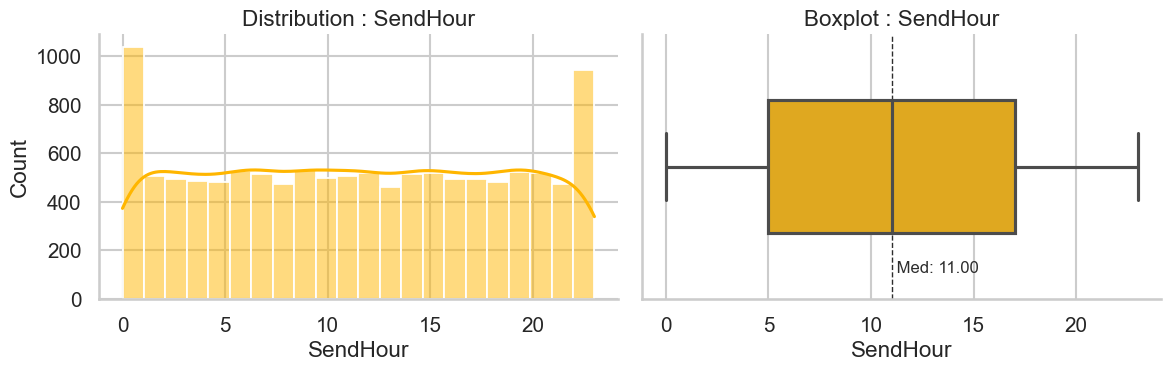

 Stats pour AudienceSize
count    12000.000000
mean      3600.083333
std       4719.786156
min        500.000000
25%       1000.000000
50%       2000.000000
75%       5000.000000
max      20000.000000
Name: AudienceSize, dtype: float64


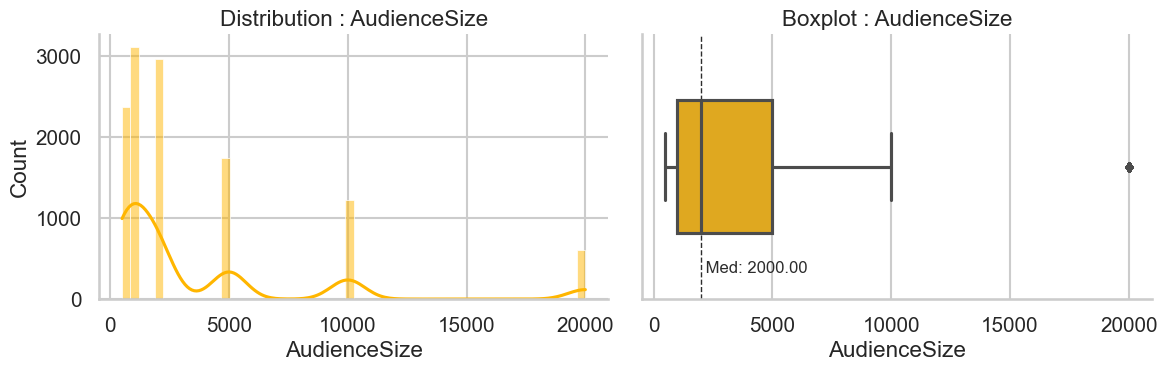

 Stats pour OpenRate
count    11999.000000
mean        15.513949
std          7.864132
min          0.500000
25%          9.855000
50%         15.160000
75%         20.865000
max         47.370000
Name: OpenRate, dtype: float64


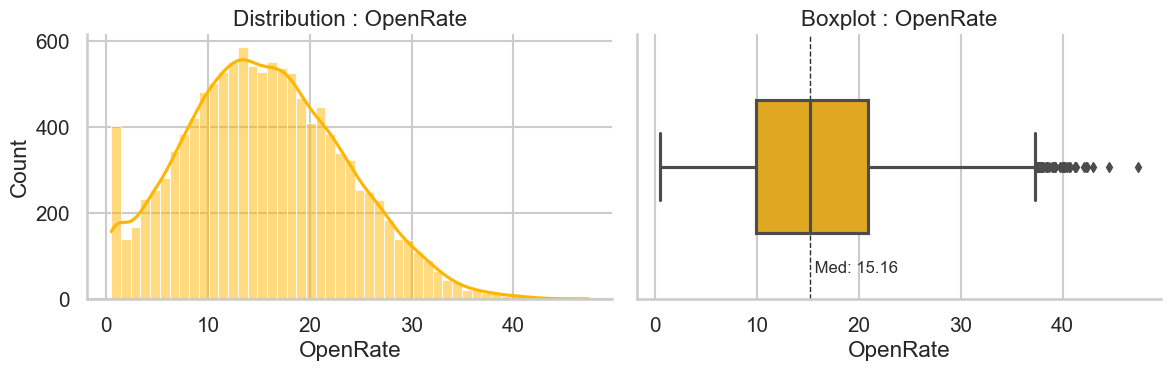

 Stats pour ClickRate
count    11997.000000
mean         1.995652
std          1.661620
min          0.100000
25%          0.460000
50%          1.750000
75%          3.090000
max          8.840000
Name: ClickRate, dtype: float64


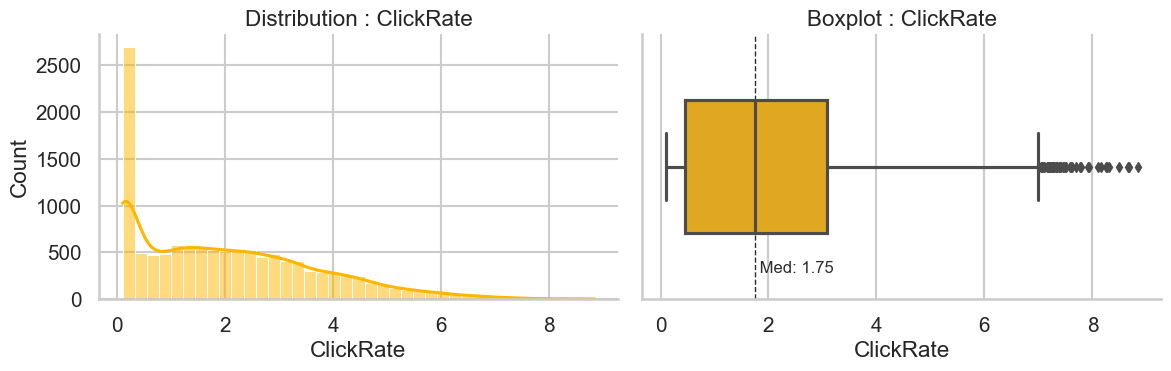

 Stats pour ConversionRate
count    12000.000000
mean         0.271348
std          0.346319
min          0.000000
25%          0.000000
50%          0.110000
75%          0.470000
max          2.120000
Name: ConversionRate, dtype: float64


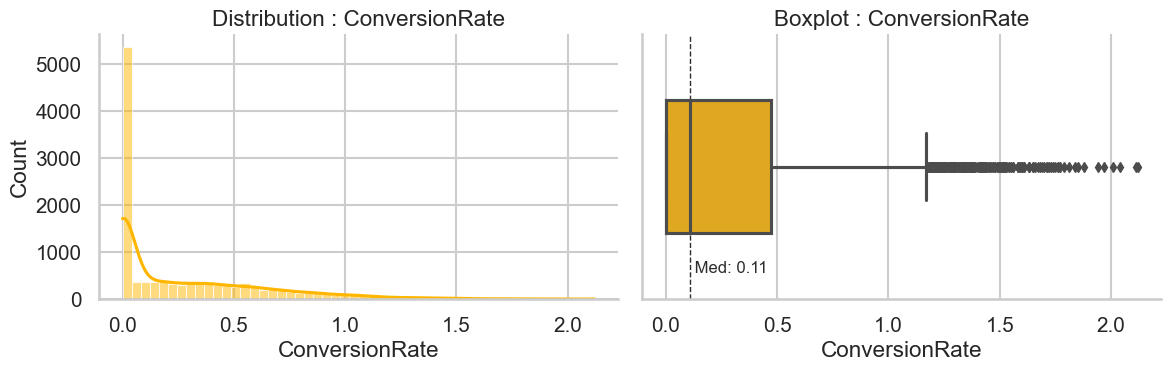


Répartition : DeviceType



Répartition : CustomerSegment



Répartition : CampaignType


In [8]:
# Config globale
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)

# Identification des variables quantitatives et qualitatives
quantitative_vars = ['SendHour', 'AudienceSize', 'OpenRate', 'ClickRate', 'ConversionRate']
qualitative_vars = ['DeviceType', 'CustomerSegment', 'CampaignType']
# Analyse des variables quantitatives
for col in quantitative_vars:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f" Stats pour {col}")
    print(df[col].describe())

    # Création figure & 2 sous-graphes
    fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(12, 4))
    
    # couleur
    color = "#FFB600"

    # Histogramme
    sns.histplot(df[col].dropna(), kde=True, color=color, ax=ax_hist)
    ax_hist.set(title=f'Distribution : {col}', xlabel=col)
    
    # Boxplot
    sns.boxplot(x=df[col], color=color, width=0.5, ax=ax_box)
    ax_box.set(title=f'Boxplot : {col}', xlabel=col)
    
    # Ajout médiane
    med = df[col].median()
    ax_box.axvline(med, color='#2D2D2D', linestyle='--', linewidth=1)
    ax_box.text(med, 0.1, f' Med: {med:.2f}', color='#2D2D2D', ha='left', fontsize=12,
                transform=ax_box.get_xaxis_transform())

    sns.despine()
    plt.tight_layout()
    plt.show()

# Analyse des variables qualitatives
for col in qualitative_vars:
    print(f"\nRépartition : {col}")
    
    # Préparation des données pour Plotly
    df_counts = df[col].value_counts().reset_index()
    df_counts.columns = [col, 'Count']
    
    # Graphique interactif
    fig = px.bar(df_counts, x=col, y='Count',
                 title=f'Répartition : {col}',
                 text_auto=True,
                 color=col,
                 color_discrete_sequence=["#D04A02", "#FFB600", "#DB536A", "#2D2D2D"])
    # #mise en forme
    fig.update_layout(showlegend=False, 
                      template="plotly_white",
                      xaxis_title=col,
                      yaxis_title="Nombre")
    
    fig.show()

Analyse bivariée : Relation entre SendHour et OpenRate

Analyse des mots-clés

In [23]:
# Fonction pour extraire les mots-clés individuels
def extraire_mots_cles(keywords_string):
    """
    Parse une chaîne de mots-clés séparés par des virgules.
    Retourne une liste de mots-clés nettoyés.
    """
    if pd.isna(keywords_string):
        return []
    mots = [mot.lower().strip() for mot in keywords_string.split(',')]
    return mots

# Appliquer la fonction à toute la colonne
df['Keywords_List'] = df['TopKeywords'].apply(extraire_mots_cles)

# Vérification
print("Exemple de parsing :")
print(f"Avant : {df['TopKeywords'].iloc[0]}")
print(f"Après : {df['Keywords_List'].iloc[0]}")
print(f"\nNombre moyen de mots-clés par campagne : {df['Keywords_List'].apply(len).mean():.1f}")

Exemple de parsing :
Avant : coulisses, tendances, incontournable, édition limitée, sélection, inspiration
Après : ['coulisses', 'tendances', 'incontournable', 'édition limitée', 'sélection', 'inspiration']

Nombre moyen de mots-clés par campagne : 6.0


4.1. Analyse des fréquences de mots clés dans la colonne TopKeywords

In [46]:
# Concaténer tous les mots-clés en une seule liste
tous_les_mots = []
for keywords_list in df['Keywords_List']:
    tous_les_mots.extend(keywords_list)

print(f"Nombre total de mots-clés : {len(tous_les_mots):,}")
print(f"Nombre de mots-clés uniques : {len(set(tous_les_mots)):,}")

# Compter les fréquences avec Counter
compteur_mots = Counter(tous_les_mots)

freq_df = pd.DataFrame(
    compteur_mots.most_common(),
    columns=["mots", "frequence"]
)

display(freq_df)


Nombre total de mots-clés : 72,000
Nombre de mots-clés uniques : 210


,mots,frequence
0,prix,1121
1,gratuit,1072
2,exclusif,1031
3,commande,981
4,profitez,862
...,...,...
205,absent,118
206,notre univers,118
207,retour,117
208,récompense,114


4.2. Identification des mots les plus utilisés dans les campagnes les plus performantes (avec OpenRate
élevé)

In [44]:
#Filtrer les campagnes les plus performantes 
df_campagnes_performantes = df.sort_values(by='OpenRate', ascending=False).head(5) \
    [['CampaignID','Subject','OpenRate','Keywords_List']]
display(df_campagnes_performantes)


,CampaignID,Subject,OpenRate,Keywords_List
11371,CMP17860,valentin — offres limitées aujourd’hui,47.37,"[événement, bonne année, moment, spécial saiso..."
6788,CMP11580,joie — offres limitées aujourd’hui,44.56,"[collection été, collection hiver, noël, spéci..."
7094,CMP20822,événement — offres limitées aujourd’hui,42.98,"[fin d’année, édition, bonne année, collection..."
4726,CMP18318,vacances : nos clients adorent,42.44,"[magie, cadeau, papa, froid, collection hiver,..."
1643,CMP11718,occasion — offres limitées aujourd’hui,42.29,"[plaisir, spécial saison, printemps, soldes, f..."


In [ ]:
#Décomposition de la liste des mots-clés 
df_campagnes_performantes_exploses = df_campagnes_performantes.explode('Keywords_List')

#Jointure de la table de frequence des mots
df_jointure = df_campagnes_performantes_exploses.merge(
    freq_df,
    left_on='Keywords_List',
    right_on='mots',
    how='left'
)

#Regroupement des mots-clés par campagnes
df_campagnes = (
    df_jointure
    .groupby(['CampaignID', 'Subject', 'OpenRate'])
    .apply(
        lambda x: list(zip(x['mots'], x['frequence']))
    )
    .reset_index(name='mots')
).sort_values(by='OpenRate', ascending=False)

pd.set_option('display.max_colwidth', None)

display(df_campagnes)

,CampaignID,Subject,OpenRate,mots
2,CMP17860,valentin — offres limitées aujourd’hui,47.37,"[(événement, 672), (bonne année, 165), (moment, 535), (spécial saison, 165), (décoration, 194), (chaud, 180)]"
0,CMP11580,joie — offres limitées aujourd’hui,44.56,"[(collection été, 169), (collection hiver, 186), (noël, 165), (spécial saison, 165), (cadeau, 728), (fin d’année, 159)]"
4,CMP20822,événement — offres limitées aujourd’hui,42.98,"[(fin d’année, 159), (édition, 184), (bonne année, 165), (collection hiver, 186), (fête, 178), (chaud, 180)]"
3,CMP18318,vacances : nos clients adorent,42.44,"[(magie, 169), (cadeau, 728), (papa, 172), (froid, 194), (collection hiver, 186), (festif, 182)]"
1,CMP11718,occasion — offres limitées aujourd’hui,42.29,"[(plaisir, 170), (spécial saison, 165), (printemps, 178), (soldes, 725), (froid, 194), (esprit, 178)]"


4.3 Comparer les mots-clés dominants par type de campagne

In [ ]:
# Compter la fréquence des mots par type de campagne
df_campaign_type = df[['CampaignType','Keywords_List']].explode('Keywords_List')

df_mot_plus_utilise = (
    df_campaign_type
    .groupby(['CampaignType', 'Keywords_List'])
    .size()
    .reset_index(name='frequence')
    .sort_values(['CampaignType', 'frequence'], ascending=[True, False])
    .drop_duplicates('CampaignType')
).sort_values(by='frequence', ascending=False)

display(df_mot_plus_utilise)

,CampaignType,Keywords_List,frequence
79,Promotion,prix,1121
8,Newsletter,concept,771
177,Reminder,terminer,519
192,Seasonal,célébrez,196
124,Re-engagement,programme,160


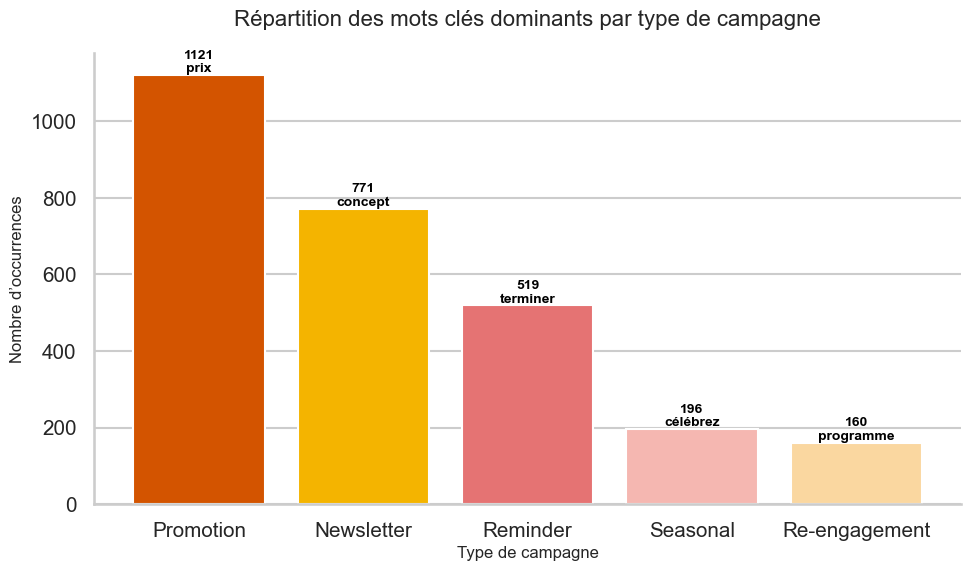

In [96]:
#Affichage graphique en barre 
couleurs = ['#D35400', '#F4B400', '#E57373', '#F5B7B1', '#FAD7A0']

plt.figure(figsize=(10, 6))

bars = plt.bar(
    df_mot_plus_utilise['CampaignType'],
    df_mot_plus_utilise['frequence'],
    color=couleurs[:len(df_mot_plus_utilise)]
)

# Titre et labels
plt.title(
    "Répartition des mots clés dominants par type de campagne",
    fontsize=16,
    pad=20
)
plt.xlabel("Type de campagne", fontsize=12)
plt.ylabel("Nombre d’occurrences", fontsize=12)

# Mise en forme 
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Afficher valeur + mot clé sur chaque barre
for bar, mot in zip(bars, df_mot_plus_utilise['Keywords_List']):
    hauteur = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        hauteur,
        f"{int(hauteur)}\n{mot}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()